In [62]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt

## Hubbard

In [63]:
all_files = os.listdir("data")
hubbard_files = [f for f in all_files if "hubbard" in f and "out" in f and "hdf5" in f]
for f in hubbard_files:
    print(f)

hubbard_out_3_3.hdf5
hubbard_out_2_3.hdf5
hubbard_out_2_2.hdf5
hubbard_out_4_4.hdf5


In [64]:
records = []
for fname in hubbard_files:
    f = h5py.File(f"data/{fname}", "r")
    l1 = f["l1"][()]
    l2 = f["l2"][()]
    nsteps = f["num_steps"][()]
    gate_counts = f["gate_counts"][:]
    eps2 = f["eps2_exact"][()]
    eps2_bound = f["eps2_bound"][()]
    evol_time = f["evol_time"][()]
    f.close()
    records.append((l1 * l2, nsteps, gate_counts[0], gate_counts[1], eps2, eps2_bound, evol_time))
df = pd.DataFrame.from_records(records, columns=["size", "steps", "1q gates", "2q gates", "eps2", "eps2 bound", "evol_time"])
print(df.head())

   size  steps  1q gates  2q gates       eps2  eps2 bound  evol_time
0     9      1       174       191  21.161177  121.500000   0.001560
1     6      2       172       150  23.540271   15.187500   0.008056
2     4      1        36        22   0.500000    1.333333   0.031852
3    16      2       596       944  54.904711  682.666667   0.004909


Text(0.5, 1.0, 'Fermi-Hubbard')

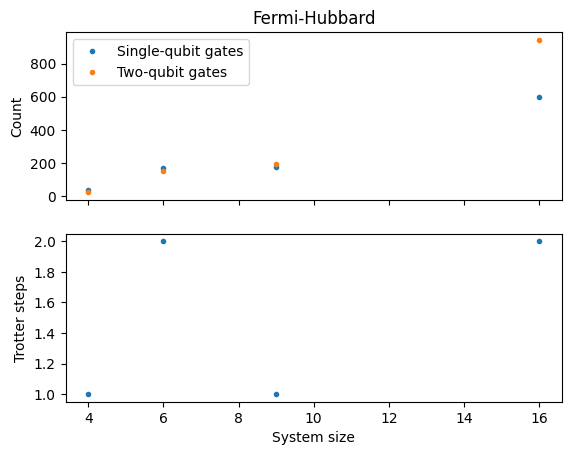

In [65]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df["size"], df["1q gates"], '.', label="Single-qubit gates")
ax[0].plot(df["size"], df["2q gates"], '.', label="Two-qubit gates")
ax[0].legend()
ax[0].set_ylabel("Count")
ax[1].plot(df["size"], df["steps"], '.', label="Trotter steps")
ax[1].set_xlabel("System size")
ax[1].set_ylabel("Trotter steps")
ax[0].set_title("Fermi-Hubbard")

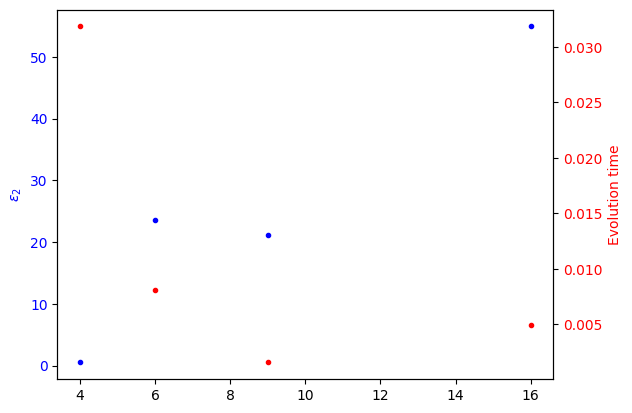

In [66]:
fig2, ax2 = plt.subplots()
color = "blue"
ax2.plot(df["size"], df["eps2"], '.', color=color, label=r"$\epsilon_2$")
# ax2.plot(df["size"], df["eps2 bound"], '.', label=r"Bound on $\epsilon_2$")
ax2.set_ylabel(r"$\epsilon_2$", color=color)
ax2.tick_params(axis="y", labelcolor=color)

color = "red"
ax2b = ax2.twinx()
ax2b.plot(df["size"], df["evol_time"], '.', color=color, label="Evolution time")
ax2b.set_ylabel("Evolution time", color=color)
ax2b.tick_params(axis="y", labelcolor=color)

## Hydrogen chains

In [67]:
all_files = os.listdir("data")
hubbard_files = [f for f in all_files if "hchain" in f and "out" in f and "hdf5" in f]
for f in hubbard_files:
    print(f)

hchain_out_4.hdf5
hchain_out_2.hdf5


In [68]:
records = []
for fname in hubbard_files:
    f = h5py.File(f"data/{fname}", "r")
    l = f["l"][()]
    nsteps = f["num_steps"][()]
    gate_counts = f["gate_counts"][:]
    eps2 = f["eps2_exact"][()]
    eps2_bound = f["eps2_bound"][()]
    evol_time = f["evol_time"][()]
    f.close()
    records.append((l, nsteps, gate_counts[0], gate_counts[1], eps2, eps2_bound, evol_time))
df = pd.DataFrame.from_records(records, columns=["size", "steps", "1q gates", "2q gates", "eps2", "eps2 bound", "evol_time"])
print(df.head())

   size  steps  1q gates  2q gates      eps2  eps2 bound  evol_time
0     4      1     11871      8972  0.049146   -0.000781   0.054401
1     2      2       697       534  0.012965   -0.000733   0.352262


Text(0.5, 1.0, 'Hydrogen chains')

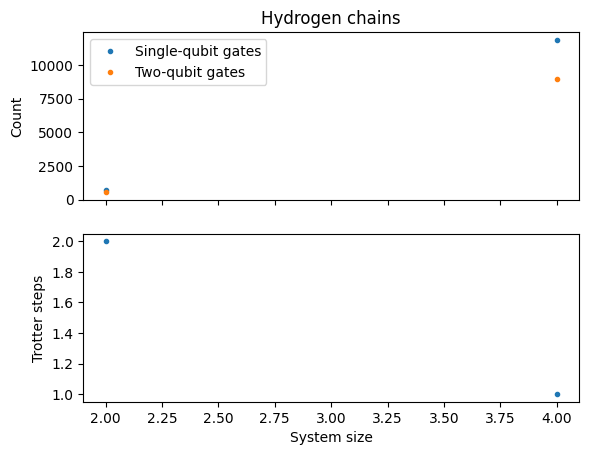

In [69]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df["size"], df["1q gates"], '.', label="Single-qubit gates")
ax[0].plot(df["size"], df["2q gates"], '.', label="Two-qubit gates")
ax[0].legend()
ax[0].set_ylabel("Count")
ax[1].plot(df["size"], df["steps"], '.', label="Trotter steps")
ax[1].set_xlabel("System size")
ax[1].set_ylabel("Trotter steps")
ax[0].set_title("Hydrogen chains")

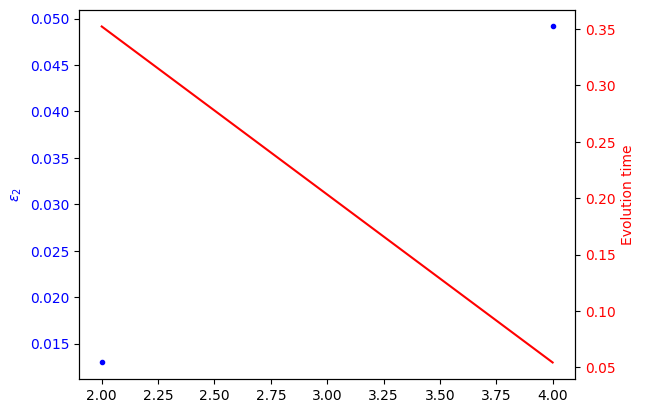

In [70]:
fig2, ax2 = plt.subplots()
color = "blue"
ax2.plot(df["size"], df["eps2"], '.', color=color, label=r"$\epsilon_2$")
# ax2.plot(df["size"], df["eps2 bound"], '.', label=r"Bound on $\epsilon_2$")
ax2.set_ylabel(r"$\epsilon_2$", color=color)
ax2.tick_params(axis="y", labelcolor=color)

color = "red"
ax2b = ax2.twinx()
ax2b.plot(df["size"], df["evol_time"], '-', color=color, label="Evolution time")
ax2b.set_ylabel("Evolution time", color=color)
ax2b.tick_params(axis="y", labelcolor=color)